# The Kolmogorov-Smirnov Test - Lab

## Introduction
In the previous lesson, we saw that the Kolmogorov–Smirnov statistic quantifies a distance between the empirical distribution function of the sample and the cumulative distribution function of the reference distribution, or between the empirical distribution functions of two samples. In this lab, we shall see how to perform this test in python. 

## Objectives

You will be able to:
* Perform 1 sample and 2 sample KS tests in Python and Scipy
* Compare the KS test to visual approaches for checking normality assumptions
* Plot the CDF and ECDF to visualize parametric and empirical cumulative distribution functions

## Generate Data

### Let's import necessary libraries and generate some data 

In [14]:
import scipy.stats as stats
import statsmodels.api as sm
import numpy as np

import matplotlib.pyplot as plt
plt.style.use('ggplot')

# Create the normal random variables with mean 0, and sd 3
x_10 = stats.norm.rvs(loc=0, scale=3, size=10)
x_50 = stats.norm.rvs(loc=0, scale=3, size=50)
x_100 = stats.norm.rvs(loc=0, scale=3, size=100)
x_1000 = stats.norm.rvs(loc=0, scale=3, size=1000)

In [34]:
all_sizes = [x_10, x_50, x_100, x_1000]

### Plot Histograms and QQ plots of above datasets and comment on the output 

- How good are these techniques for checking normality assumptions?
- Compare both these techniques and identify their limitations/benefits etc. 


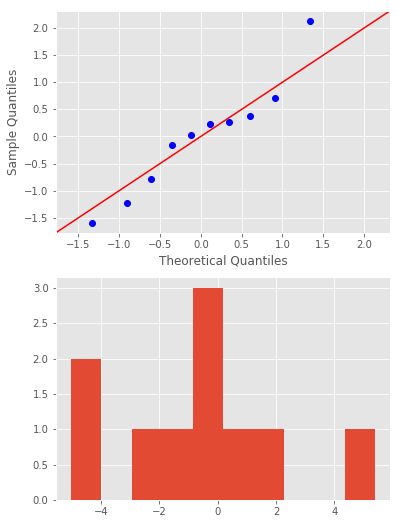

In [33]:
def first(data):
    fig = plt.figure(figsize=(6,9))
    ax1 = plt.subplot(211)
    ax2 = plt.subplot(212)
    qq = sm.qqplot(data, line='45', fit=True, ax=ax1)
    hist = plt.hist(data)
    return qq, hist
first(x_10)
plt.show()

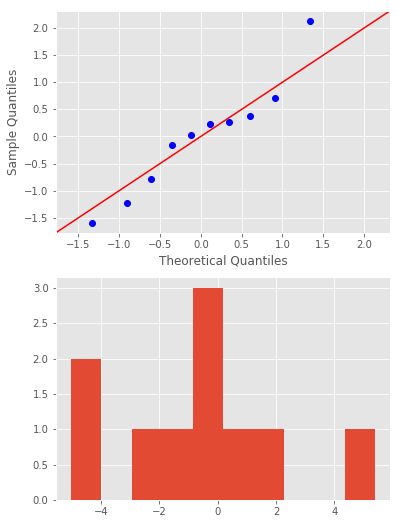

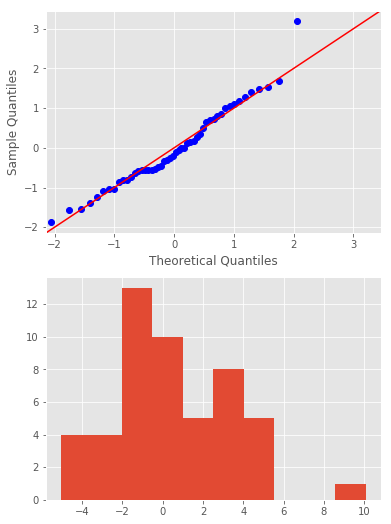

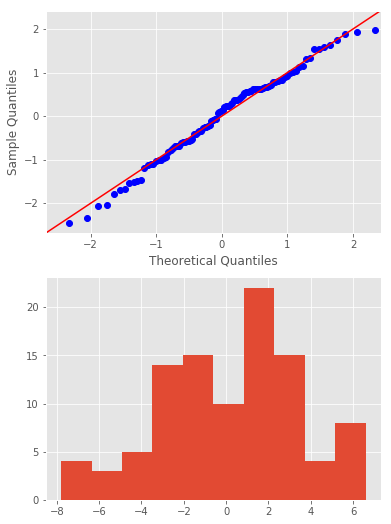

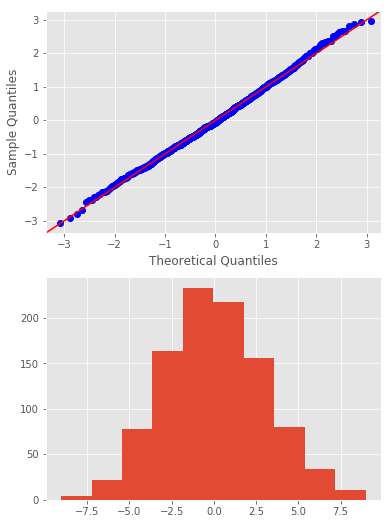

In [37]:
for x in all_sizes:
    first(x)

x_10


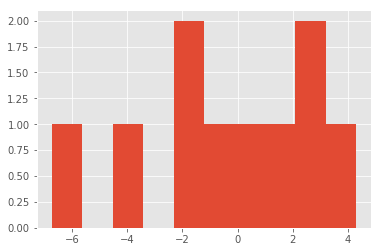

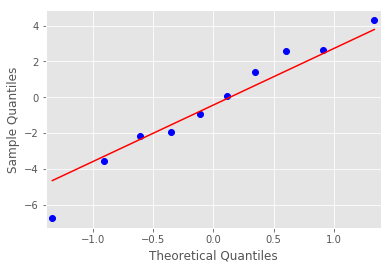

x_50


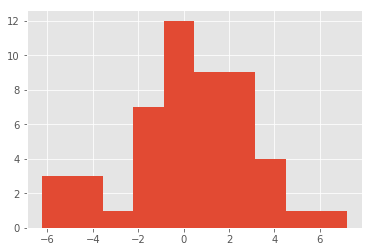

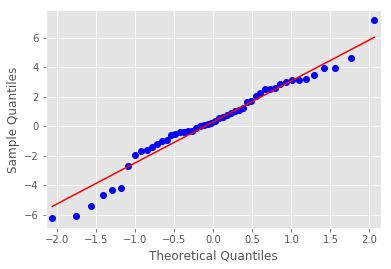

x_100


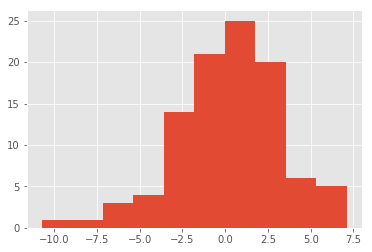

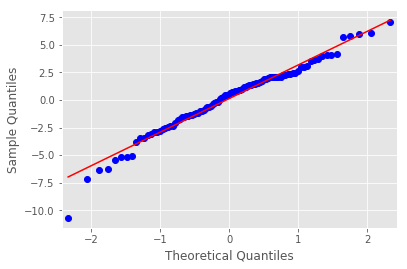

x_1000


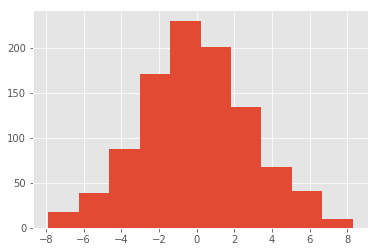

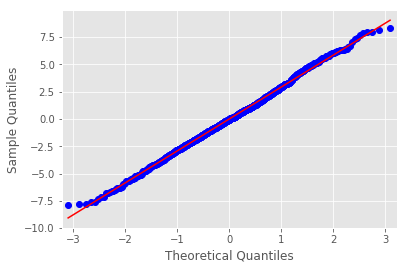

In [2]:
# Plot histograms and QQplots for above datasets



In [ ]:
# your comments

# seems that the accuracy in testing for normality increases as the sample size increases

In [ ]:
# FI's comments:


# Histograms should not be used solely to detect normality directly
# Histograms are better to look for symmetry, skewness, and outliers 
# These can instead be used to get an indications of non-normality. 

# We see some outliers in our datasets
# no clear indications of non-normality for each plot.

# The QQ plot is a much better visualization of data as gives a reference to compare against  
# Shows a better picture about normality instead of relying on the histograms (or box plots).
# From QQ plot we can be more assured our data is normal - compared to non normality check in histogram

### Creat a function to plot the normal CDF and ECDF for a given dataset
- Create a function ks_plot(data) to generate an empirical CDF from data
- Create a normal CDF using the same mean = 0 and sd = 3 , having the same number of values as data

(array([ 7.,  8., 13., 11., 18., 11., 14.,  7.,  8.,  3.]),
 array([-6.78389795, -5.32089365, -3.85788935, -2.39488504, -0.93188074,
         0.53112356,  1.99412786,  3.45713217,  4.92013647,  6.38314077,
         7.84614507]),
 <a list of 10 Patch objects>)

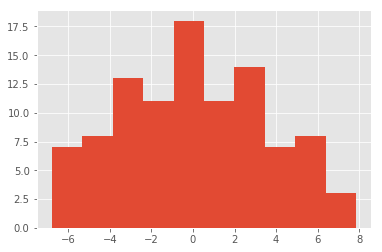

In [56]:
x = stats.norm.rvs(loc=0, scale=3, size=100)
p = np.linspace(-10, 10, 100)
plt.hist(g)

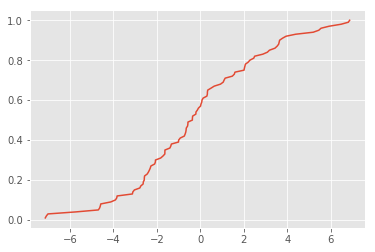

In [75]:
x = np.sort(x)
n = x.size
y = np.arange(1, n+1) / n
sns.lineplot(x=x, y=y)

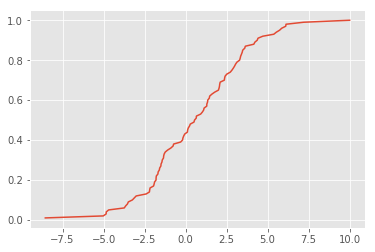

In [94]:
x2 = stats.norm.rvs(loc=0, scale=3, size=100)
x2 = np.sort(x2)
n = x.size
y = np.arange(1, n+1) / n
plt.plot(x2, y)

In [68]:
import seaborn as sns

In [101]:
def ks_plot(data):
    plt.figure(figsize=(10,8))
    x1 = np.sort(data)
    x2 = np.sort(np.random.normal(loc=0, scale=3, size=data.size))
    n = data.size
    y = np.linspace(0, 1, len(data))
    plot1 = plt.plot(x1, y, label='ECDF')
    plot2 = plt.plot(x2, y, label='CDF')
    plt.title('Empirical vs Cumulative Distribution Function for n={}'.format(len(data)))
    plt.legend()
    return plot1, plot2

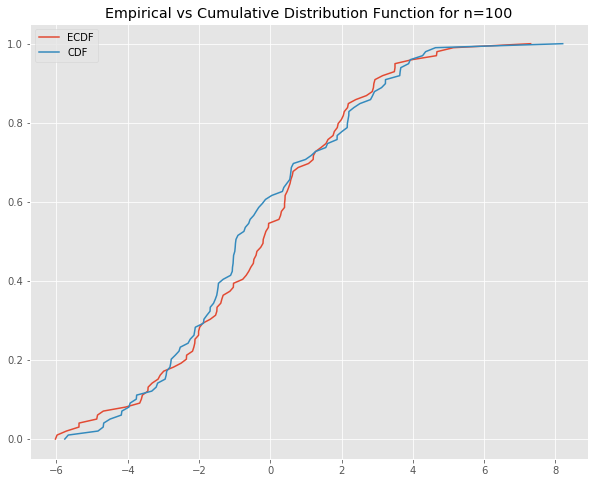

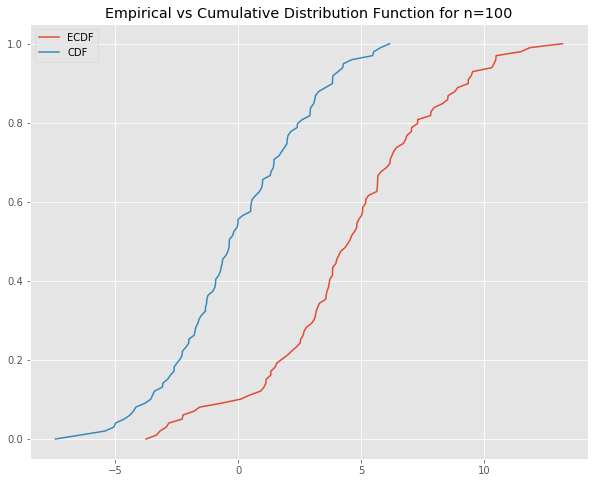

In [103]:
ks_plot(stats.norm.rvs(loc=0, scale=3, size=100)); 
ks_plot(stats.norm.rvs(loc=5, scale=4, size=100));

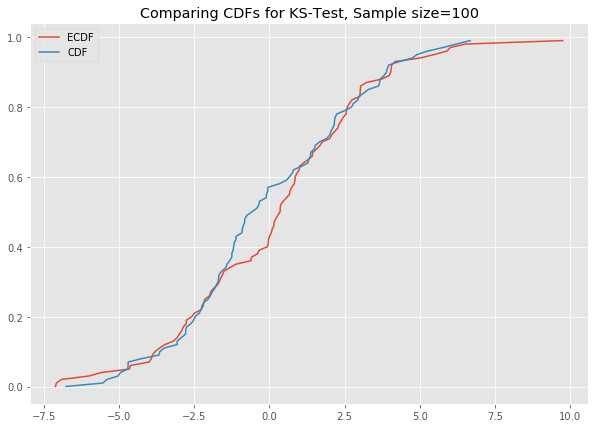

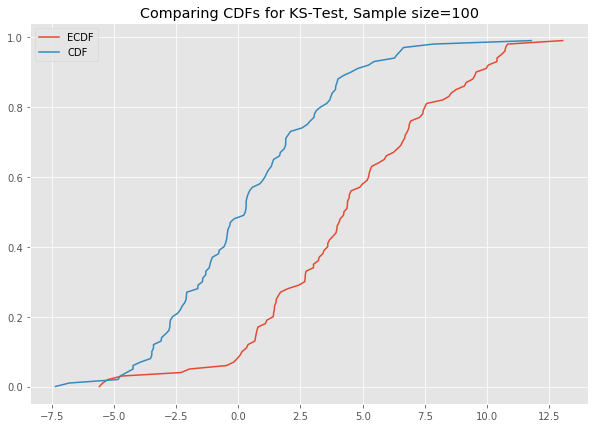

In [7]:
# You code here 

def ks_plot(data):

    pass
    
# Uncomment below to run the test
# ks_plot(stats.norm.rvs(loc=0, scale=3, size=100)) 
# ks_plot(stats.norm.rvs(loc=5, scale=4, size=100))


This is awesome. The difference between two cdfs in the second plot show that sample did not come from the distribution which we tried to compare it against. 

### Now you can run all the generated datasets through the function ks_plot and comment on the output.

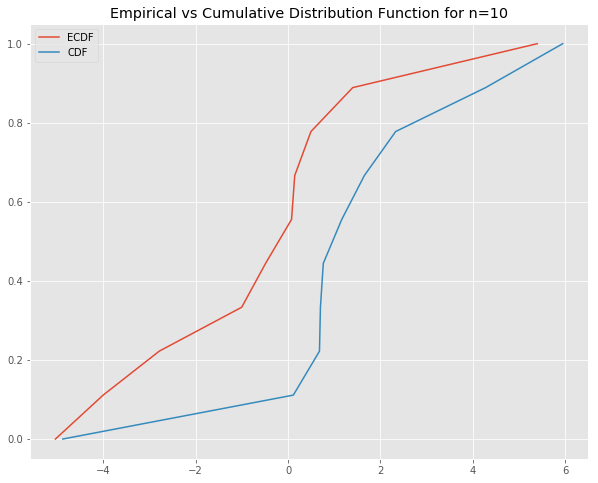

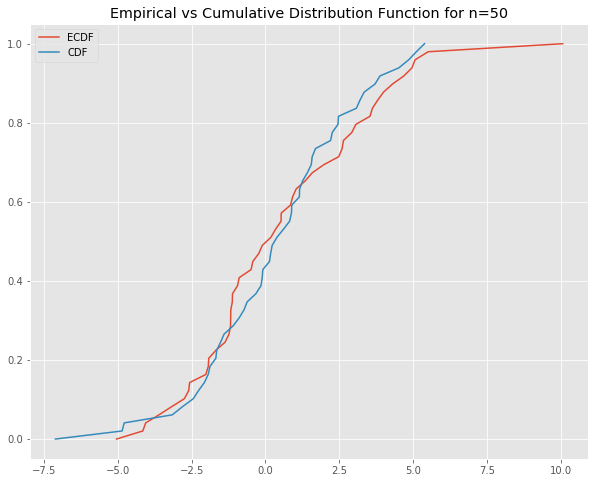

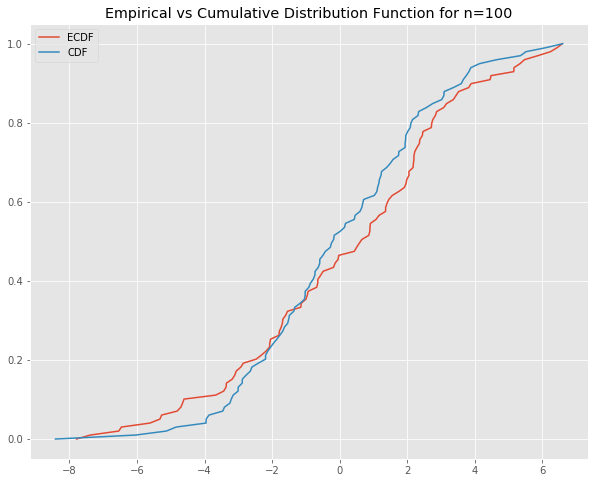

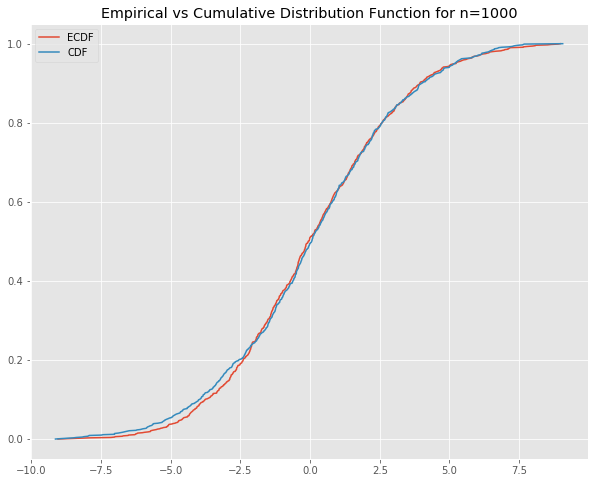

In [104]:
for x in all_sizes:
    ks_plot(x)

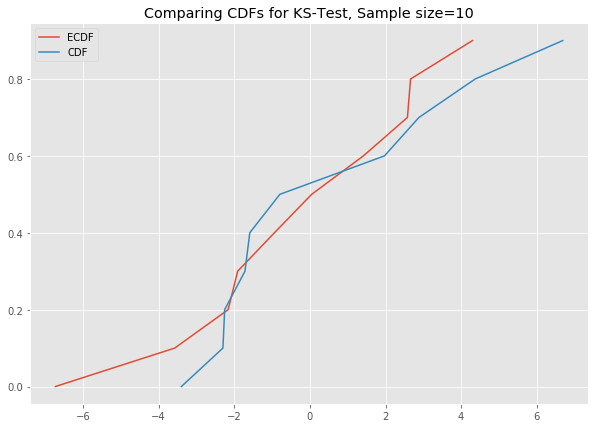

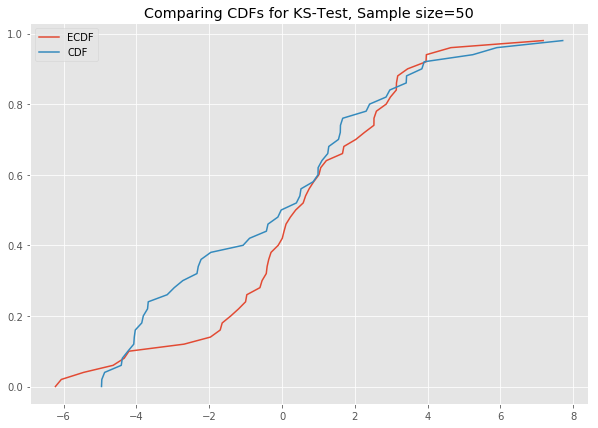

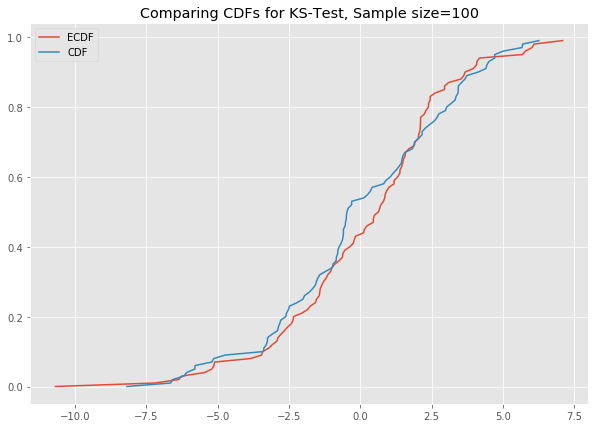

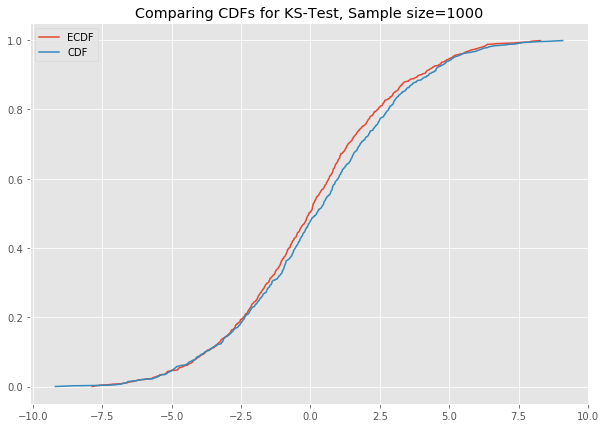

In [12]:
# Your code here 

In [105]:
# Your comments here 


# as the sample size increases, the empirical cdf becomes closer and closer to the theoretical cdf

In [106]:
# FI's comments:

# As we have more data values to compare, we get a better idea of normality
# Due to randomness in smaller sample sizes, it is very likely that the value of d would be high
# As our sample size goes from 50 to a 1000, we are in a much better position to comment on normality

### KS test in SciPy

Lets run the Kolmogorov-Smirnov test, and use some statistics to get a final verdict on normality. It lets us test the hypothesis that the sample is a part of the standard t-distribution. In SciPy, we run this test using the method below:

```python
scipy.stats.kstest(rvs, cdf, args=(), N=20, alternative='two-sided', mode='approx')
```
Details on arguments being passed in can be viewed at this [link to official doc.](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.kstest.html)


### Run the KS test for normality assumption using the datasets created earlier and comment on the output
- Perform the KS test against a normal distribution with mean = 0 and sd = 3
- If p < .05 we can reject the null hypothesis and conclude our sample distribution is not identical to a normal distribution.

In [118]:
for x in all_sizes:
    print(stats.kstest(x, 'norm', args=(0,3)))

KstestResult(statistic=0.2345136959268007, pvalue=0.5760550623883227)
KstestResult(statistic=0.09633263471857889, pvalue=0.7431328009370008)
KstestResult(statistic=0.10837551627478026, pvalue=0.17741720807986283)
KstestResult(statistic=0.01832721837795323, pvalue=0.8901385148883582)


In [15]:
# Perform KS test 

# Your code here 

# KstestResult(statistic=0.1377823669421559, pvalue=0.9913389045954595)
# KstestResult(statistic=0.13970573965633104, pvalue=0.2587483380087914)
# KstestResult(statistic=0.0901015276393986, pvalue=0.37158535281797134)
# KstestResult(statistic=0.030748345486274697, pvalue=0.29574612286614443)

KstestResult(statistic=0.1377823669421559, pvalue=0.9913389045954595)
KstestResult(statistic=0.13970573965633104, pvalue=0.2587483380087914)
KstestResult(statistic=0.0901015276393986, pvalue=0.37158535281797134)
KstestResult(statistic=0.030748345486274697, pvalue=0.29574612286614443)


In [ ]:
# Your comments here 

# my p-values differ quite a bit from the curriculum
# they are nowhere near 0.05, so the null is rejected in all cases

In [ ]:
# FI's comments:

# The P-value in all cases is much greater than .05 
# We cannot reject the Null Hypothesis i.e. our sample is IDENTICAL to a normal distribution
# This is very intuitive as we started off with normal distributions


### Generate a uniform distribution and plot / calculate the ks test against a uniform as well as a normal distribution

In [124]:
# Try with a uniform distribution
x_uni = np.random.rand(1000)

print(stats.kstest(x_uni, 'uniform'))
print(stats.kstest(x_uni, 'norm'))

# KstestResult(statistic=0.023778383763166322, pvalue=0.6239045200710681)
# KstestResult(statistic=0.5000553288071681, pvalue=0.0)

KstestResult(statistic=0.032194711573493684, pvalue=0.24626770856540015)
KstestResult(statistic=0.5001723318294233, pvalue=0.0)


In [125]:
# Your comments here 

# the null is that the distribution we input is the same as the one we have in quotes
# so it's not surprising that the unifrom dist. ks-test would have a high p-value and the normal dist. would not

## 2 sample KS test
A two sample KS test is available in SciPy using following function
```python 
scipy.stats.ks_2samp(data1, data2)[source]
```

Let's generate some bi-modal data first for this test 

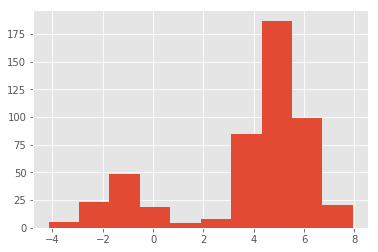

In [126]:
# Generate binomial data
N = 1000
x_1000_bi = np.concatenate((np.random.normal(-1, 1, int(0.1 * N)), np.random.normal(5, 1, int(0.4 * N))))[:, np.newaxis]
plt.hist(x_1000_bi);

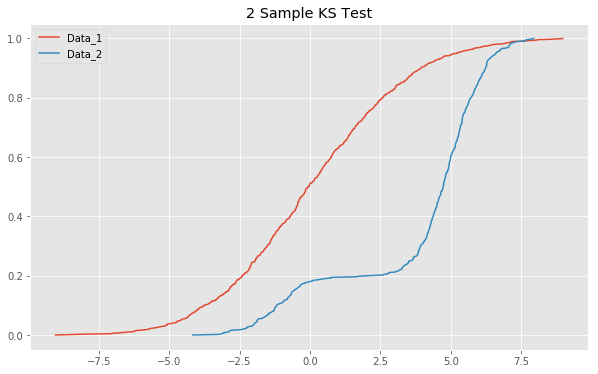

In [145]:
def ks_plot_2sample(data_1, data_2):
    '''
    Data entereted must be the same size.
    '''
    plt.figure(figsize=(10,6))
    x1 = np.sort(data_1)
    x2 = np.sort(data_2)
    
    n1 = len(data_1)
    n2 = len(data_2)
    
    y1 = np.linspace(0, 1, n1)
    y2 = np.linspace(0, 1, n2)
    
    plot1 = plt.plot(x1, y1, label='{}'.format('Data_1'))
    plot2 = plt.plot(x2, y2, label='{}'.format('Data_2'))
    
    plt.title('2 Sample KS Test')
    plt.legend()    
    return plot1, plot2

ks_plot_2sample(x_1000, x_1000_bi[:,0]);


### Plot the CDFs for x_1000_bimodal and x_1000 and comment on the output 

In [148]:

# Plot the CDFs
  
    

# Uncomment below to run
# ks_plot_2sample(x_1000, x_1000_bi[:,0])


In [ ]:
# You comments here 

# the bimodal data is tracking at first but then has a large hump in its accumulation

In [156]:
x_1000_bi[:,0].shape

# I don't know why they do this - p

(500,)

In [155]:
x_1000.shape

(1000,)

### Run the two sample KS test on x_1000 and x_1000_bi and comment on the results

In [157]:

stats.ks_2samp(x_1000[0:500], x_1000_bi[:,0])


# Ks_2sampResult(statistic=0.633, pvalue=4.814801487740621e-118)

Ks_2sampResult(statistic=0.624, pvalue=2.431313596752208e-86)

In [158]:
# Your comments here 

# unsurprisingly the p-value is very small 
# we reject the null hypothesis that the two samples are from the same distribution

## Summary

In this lesson, we saw how to check for normality (and other distributions) using one sample and two sample ks-tests. You are encouraged to use this test for all the upcoming algorithms and techniques that require a normality assumption. We saw that we can actually make assumptions for different distributions by providing the correct CDF function into Scipy KS test functions. 